In [ ]:
import sys
sys.path.append('..')

from olfactory_navigation import Environment
from olfactory_navigation.agents.infotaxis_agent import Infotaxis_Agent
from olfactory_navigation.agents import FSVI_Agent
from olfactory_navigation.agents import QMDP_Agent
from olfactory_navigation.simulation import run_test
from olfactory_navigation.test_setups import run_all_starts_test


from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import cupy as cp

In [2]:
from cupy.cuda import runtime as cuda_runtime
cuda_runtime.setDevice(0)

# Environment

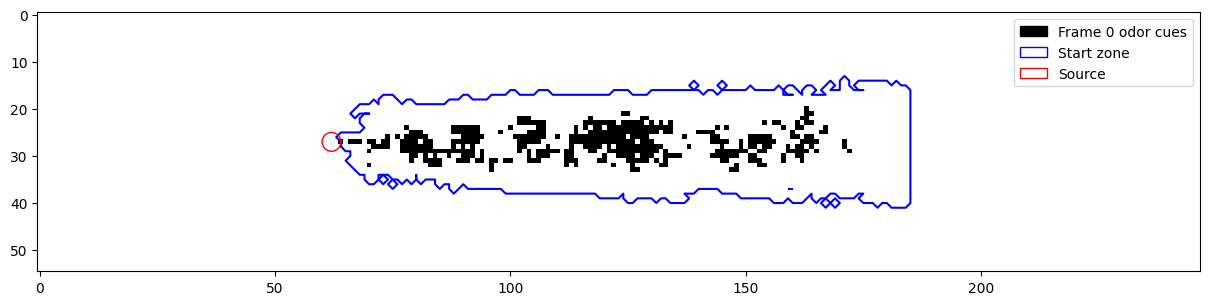

In [3]:
# data_path = "/storage/rando/data/nose_data_27_123.npy" # INSERT YOUR PATH
data_path = "G:\\My Drive\\Documents\\Universita di Genova\\Pimlb work\\nose_data_27_123.h5"

env = Environment(data_file=data_path,
                  data_source_position=[13, 0],
                  source_radius=2,
                  margins=[14, 62],
                  boundary_condition='wrap_vertical',
                  start_zone='odor_present',
                  odor_present_threshold=3e-6)

env.plot()

# Infotaxis

In [4]:
info_ag = Infotaxis_Agent(env)

[Warning] The whole dataset is being querried, it will be reshaped at this time. To avoid this, avoid querrying environment.data directly.


In [5]:
info_hist = run_all_starts_test(info_ag, use_gpu=True)

[02/02/2026, 16:10:32] Sending Model to GPU...
[02/02/2026, 16:10:32]     > Done in 0.016s


  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

# FSVI

In [ ]:
fsvi_ag = FSVI_Agent(env)

In [ ]:
_ = fsvi_ag.train(expansions=10, use_gpu=True)

In [ ]:
fsvi_hist = run_all_starts_test(fsvi_ag, use_gpu=True)

# QMDP

In [ ]:
qmdp_ag = QMDP_Agent(env)

In [ ]:
train_hist = qmdp_ag.train(expansions=1000)

In [ ]:
qmdp_hist = run_all_starts_test(qmdp_ag, use_gpu=True)